In [106]:
using Pkg
Pkg.activate("/home/fedflorio/phd")

  Activating project at `~/phd`


In [107]:
using Revise
using LegendrePolynomials, TensorTrains, Random, IterTools

Here the Legendre polynomials are tested for their ability to reproduce a probability distribution for a spin $s$.

The original distribution is $\mathbb{P}[s = +1] = p$ and $\mathbb{P}[s = -1] = 1-p$

In [108]:
p = 0.2
eps = 1/10
K = 12

a1, b1 = -1, -1+eps
a2, b2 = 1-eps, 1
# a1, b1 = -0.5,0.5
# a2, b2 = π, π
;

The Legendre polynomials are defined in the interval $[-1,1]$, in which they are orthogonal with respect to the inner product $\langle f,g \rangle = \int_{-1}^{+1} f(x) g(x) dx$.

The projection of a generic function $f$ on the degree-$l$-Legendre polynomial $P_l$ is $c_l = \langle f, P_l \rangle$.

Here the probability distributions are approximated as sums of square functions of width $\epsilon$.

In [109]:
c = [(1-p)/eps * intPl(l, a1, b1) + p/eps * (intPl(l, a2, b2)) for l in 0:K]

13-element Vector{BigFloat}:
  0.7071067811865474157280650609918975530308206402154202539644430166795863179629578
 -0.6981045766932055003781016018340383409262772269035292840340259715170567744735308
  1.351873699721981691279781504939667024660650271216527465605025996008003996706748
 -0.8131089208633124579070424526791033198264698029639034251501713906288421052082072
  1.210664036573783371092586779607617711536995795179188706619221043044032359858875
 -0.5744929688496171058659427253225081558005355323969476885947911266438320465610445
  0.6406795323672237366496687947044458252298936156164561093291024557183632737174959
 -0.1846061536518358084701561856261794155594682587082398777925456482098317406723118
  0.002890595321257485613707732017403210105558035285947046734083327350958020349203974
  0.1426318403557925023754429963249926306304127494746683494260397665436132172422923
 -0.3908459005614621123504765015631136010048932279133816688434652426072796194023642
  0.2688406487604230947143707014804391556905380

So, now one has approximated the function as $f(x) \simeq \sum_{l=0}^K c_l P_l(x) \coloneqq \tilde f$.

To test the accuracy of the approximation, one calculates $||f - \tilde f||^2 = ||f||^2 - ||\tilde f||^2$.

---

_Proof:_
$$
||f - \tilde f||^2 = ||f||^2 + ||\tilde f||^2 - 2 \langle f, \tilde f \rangle
$$
$$
\begin{align*}
    & \tilde f = \sum_{l=0}^K c_l P_l = \sum_{l=0}^K \langle f, P_l \rangle P_l\\
    & ||\tilde f||^2 = \sum_{l=0}^K c_l^2\\
    \implies & \langle f, \tilde f \rangle = \left\langle f, \sum_{l=0}^K \langle f, P_l \rangle P_l \right\rangle = \sum_{l=0}^K \langle f, P_l \rangle \left\langle f,  P_l \right\rangle = \sum_{l=0}^K c_l^2 \\
    \implies & ||f - \tilde f||^2 = ||f||^2 - ||\tilde f||^2
\end{align*}
$$

In [110]:
normF = (p^2 + (1-p)^2) / eps       # normF = eps * ( (p/eps)^2 + ((1-p)/eps)^2 )
normF̃ = sum(c.^2)

err = (normF - normF̃)/normF

0.09784790200926610819411387539114677931905483453152388439223868566902305304179899

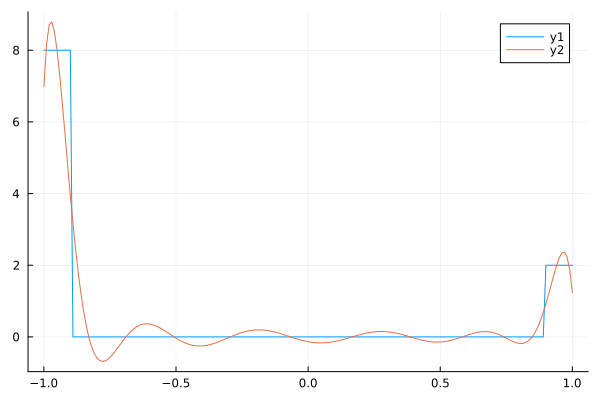

In [111]:
using Plots

xplot = collect(-1:0.01:1)
f(x) = (1-p)/eps * (a1≤x≤b1) + p/eps * (a2≤x≤b2)
f̃(x) = sum([c[l+1]*Pl(x,l,norm=Val(:normalized)) for l in 0:K])
# fcanonical(x) = sum([c[l+1] * sum([coeffPl(l,k)*x^k for k in 0:l]) for l in 0:K])

plt = plot(xplot, f.(xplot))
plot!(plt, xplot, f̃.(xplot))
# plot!(plt, xplot, fcanonical.(xplot))